# Price Strategy Alegra #

#### En este proyecto se presenta una base de datos de una compañia SaaS (Software as Service) que ofrece el servicio de un software contable en la nube para compáñias de diferentes tamaños alrededor de Latinoamerica. En este caso, trabajaremos con registros relacionados a clientes establecidos en Colombia.


### Para ello, se han trazado los siguientes Objetivos :

#### * Realizar un Analisis para Encontrar Oportunidades de Monetización de los Usuarios presentes en la BD
####  * Plantear un Modelo de Pricing Ideal basado en el analisis de datos realizado
#### * Framework para evaluar la estrategia Desarrollada 

#### Cargamos Librerias y Datos iniciales ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime, timedelta

In [2]:
# Cargar Data 
db_data = pd.read_excel('Copia de BD reto pricing analyst Fechas Corregidas.xlsx')
db_data = db_data.convert_dtypes()
db_data

,idCompany,country,registrationDate,planName,paymentFrequency,currency,planPrice,latestPaidPlan,firstPaymentDate,retirementDate,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests
0,298933,colombia,2020-06-01,pyme,12,COP,53910,pyme,2020-11-02,NaT,13,360818770.0,5,3,275
1,5368,colombia,2021-10-08,consulta,<NA>,COP,<NA>,pyme,NaT,2021-10-29,0,0.0,1,0,21
2,654231,colombia,2021-03-24,pyme,1,COP,53910,pyme,NaT,NaT,34,119551514.0,5,19,104
3,605717,colombia,2019-02-07,plus,1,COP,179910,plus,2019-08-20,NaT,9133,391070000000.0,46,5989,28
4,298693,colombia,2021-05-23,pyme,1,COP,53910,pyme,NaT,NaT,35,642636085.0,1,22,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,773474,colombia,2020-05-30,pro,1,COP,107910,pro,2021-04-21,NaT,197,8752708030.0,11,165,63
4996,1030369,colombia,2019-12-25,pyme,1,COP,53910,pyme,2021-07-26,NaT,40,3231732600.0,3,33,62
4997,42280,colombia,2021-03-20,plus,6,COP,179910,plus,NaT,NaT,3918,236170000000.0,18,651,19
4998,919064,colombia,2020-08-20,pro,12,COP,107910,pro,2021-02-16,NaT,239,1505613243.0,8,10,140


In [3]:
db_data.shape

(5000, 15)

In [4]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   idCompany         5000 non-null   Int64         
 1   country           5000 non-null   string        
 2   registrationDate  5000 non-null   datetime64[ns]
 3   planName          4903 non-null   string        
 4   paymentFrequency  4028 non-null   Int64         
 5   currency          5000 non-null   string        
 6   planPrice         4003 non-null   Int64         
 7   latestPaidPlan    4747 non-null   string        
 8   firstPaymentDate  3168 non-null   datetime64[ns]
 9   retirementDate    745 non-null    datetime64[ns]
 10  avgMonInvoices    4903 non-null   Int64         
 11  avgMonBilling     4903 non-null   Float64       
 12  users             4903 non-null   Int64         
 13  downloadReports   4903 non-null   Int64         
 14  helpRequests      4903 n

## Info de la Data ##
La data suministrada esta compuesta por un total de 5000 registros y 15 columnas las cuales contienen los siguientes caracteristicas:

* **idCompany** = Llave para identificar cada una de las compañías clientes que hacen parte del análisis.

* **country**  = Pais de residencia del cliente. 

* **registrationDate** = Fecha de Registro del usuario en la plataforma.

* **planName** = Plan actual al que se encuentra suscrito el cliente :  Planes pago: Pyme, Pro, Plus / Plan no pago: Consulta.

* **paymentFrequency** =  Representa la frecuencia de pago de cada cliente Ejemplo: Un usuario con un plan de 100USD con frecuencia de pago de 12, pagará 1200USD cada año (cada 12 meses). En ese caso si indica 1  se refiere a una suscripción al plan Anual

* **currency** = Moneda en la cual realiza el pago de la suscripción.

* **planPrice** = Precio del Plan al cual esta suscrito el cliente expresado en la moneda correspondiente. 

* **latestPaidPlan** = Menciona el ultimo plan al que se suscribio o se encuentra suscrito el cliente. 

* **firstPaymentDate** = Fecha en la cual realizo la  primera suscripción paga al servicio. 

* **retirementDate** = Fecha en que se retiro del algun plan pago que tenia contratado.

* **avgMonInvoices** = Número de facturas en promedio realizadas en la plataforma  en los últimos 6 meses.

* **avgMonBilling** = Monto de facturación promedio (ingresos facturados) de la compañía los últimos 6 meses.

* **users** = Numero de usuarios asignados por la compañia cliente que tienen acceso a la aplicación.

* **downloadReports** = Número de reportes descargados en promedio mensualmente por parte del cliente en la plataforma.

* **helpRequests** = Número de solicitudes de soporte realizadas en promedio mensualmente.


## Limpieza y Organización de la Data ##
### Se verifica que los formatos de las columnas correspondan con el tipo de dato que se ha importado
* Tomando como base la columna con datos de fechas creamos una columna con los periodos del registro (registrationDate) para luego poder organizar la data de acuerdo al mes en que se registraron por primera vez en la plataforma. realizamos lo mismos con las columnas de primer pago recibido (firstPaymentDate) y la fecha del ultimo pago (retirementDate)

* verificamos integridad de los datos al validar que solo exista un IdCompany por cada registro. En este caso, se observa que existen 5000 registros unicos en idCompany por tanto confirmamos que no existen compañias duplicadas en el dataframe. 

In [5]:
# creamos los periodos para el analisis 
db_data['Periodo Ingreso'] = pd.to_datetime(db_data['registrationDate']).dt.to_period("M")
db_data['Periodo Suscripcion Paga'] = pd.to_datetime(db_data['firstPaymentDate']).dt.to_period("M")
db_data['Periodo Retiro'] = pd.to_datetime(db_data['retirementDate']).dt.to_period("M")

In [6]:
# Info Dataframe luego de la transformación de las Fechas.
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   idCompany                 5000 non-null   Int64         
 1   country                   5000 non-null   string        
 2   registrationDate          5000 non-null   datetime64[ns]
 3   planName                  4903 non-null   string        
 4   paymentFrequency          4028 non-null   Int64         
 5   currency                  5000 non-null   string        
 6   planPrice                 4003 non-null   Int64         
 7   latestPaidPlan            4747 non-null   string        
 8   firstPaymentDate          3168 non-null   datetime64[ns]
 9   retirementDate            745 non-null    datetime64[ns]
 10  avgMonInvoices            4903 non-null   Int64         
 11  avgMonBilling             4903 non-null   Float64       
 12  users               

In [7]:
# Integridad de los registros IdCompany
db_data.idCompany.nunique()

5000

## Valores nulos en el dataframe
* Al evaluar los valores nulos nos encontramos que los usuarios que pertenecen al grupo de consulta en nombre de plan tienen valores nulos en diferentes columnas debido a que muchos nunca han formado parte de una suscripción paga. por tanto se realizo busqueda de valores nulos descartando que fueran usuarios del grupo de consulta.

* Luego de esto, Se encontraron 97 valores nulos en la columna PlanName (indica el plan al que se encuentra suscrito el cliente), es la misma cantidad de valore nulos encontrados en las ultimas 5 columnas {avgMonthInvoices hasta helpRequests} Sin embargo, algunos presentan valores validos para las columnas : latestPaidPlan , por tanto indica que antes tuvieron un plan contratado. Estos 97 valores nulos encontrados se descartan por tener gran cantidad de valores faltantes lo cual no permite que sean aptos para la analisis a efectuar. 

* Se encontraron inconsistencia en algunos registros que tienen un nombre de plan asignado pero no cuentan con una fecha de primer pago de suscripcion ni fecha de retiro, al estudiar en profundidad estos valores, corresponden a todos los registros del año 2021 en diferentes suscripciones pagas ( pyme, pro , plus). Por tanto, se considera un error de la data al no tener fecha de pago de suscripción valida. Se decide mantener los registros en su estado original a pesar de la ausencia del dato de fecha debido a que si se modifican practicamente no tendriamos registros de suscriptores pagos del año 2021. 


* Los valores faltante en la columna paymentFrecuency corresponden al total de valores que aun se mantienen en la versión gratuita del programa (consulta) 972 usuarios se mantienen en esta versión. 

In [8]:
# Valores Nulos 
db_data.isnull().sum()

idCompany                      0
country                        0
registrationDate               0
planName                      97
paymentFrequency             972
currency                       0
planPrice                    997
latestPaidPlan               253
firstPaymentDate            1832
retirementDate              4255
avgMonInvoices                97
avgMonBilling                 97
users                         97
downloadReports               97
helpRequests                  97
Periodo Ingreso                0
Periodo Suscripcion Paga    1832
Periodo Retiro              4255
dtype: int64

In [9]:
# 97 valores con gran cantidad de registros nulos
nulos = db_data[(db_data['planName'].isnull())]
nulos

,idCompany,country,registrationDate,planName,paymentFrequency,currency,planPrice,latestPaidPlan,firstPaymentDate,retirementDate,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests,Periodo Ingreso,Periodo Suscripcion Paga,Periodo Retiro
10,82869,colombia,2020-05-20,<NA>,12,COP,53910,<NA>,NaT,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2020-05,NaT,NaT
117,931630,colombia,2021-01-04,<NA>,6,COP,53910,pyme,NaT,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2021-01,NaT,NaT
284,215647,colombia,2019-09-17,<NA>,12,COP,53910,plus,2020-03-29,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2019-09,2020-03,NaT
396,544454,colombia,2021-12-25,<NA>,3,COP,53910,plus,NaT,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2021-12,NaT,NaT
432,78318,colombia,2021-02-18,<NA>,12,COP,53910,pro,NaT,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2021-02,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,277694,colombia,2020-01-13,<NA>,12,COP,<NA>,pyme,2020-06-24,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2020-01,2020-06,NaT
4879,784280,colombia,2020-06-12,<NA>,12,COP,53910,plus,2021-09-24,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2020-06,2021-09,NaT
4938,643906,colombia,2020-06-08,<NA>,6,COP,<NA>,pyme,2021-02-07,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2020-06,2021-02,NaT
4962,411374,colombia,2021-04-23,<NA>,6,COP,107910,<NA>,NaT,NaT,<NA>,<NA>,<NA>,<NA>,<NA>,2021-04,NaT,NaT


In [10]:
# Se descartan del dataframe los valores determinados como nulos (97 valores que no cumplen con el criterio establecido )
db_data = db_data.drop(index=nulos.index)
db_data

,idCompany,country,registrationDate,planName,paymentFrequency,currency,planPrice,latestPaidPlan,firstPaymentDate,retirementDate,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests,Periodo Ingreso,Periodo Suscripcion Paga,Periodo Retiro
0,298933,colombia,2020-06-01,pyme,12,COP,53910,pyme,2020-11-02,NaT,13,360818770.0,5,3,275,2020-06,2020-11,NaT
1,5368,colombia,2021-10-08,consulta,<NA>,COP,<NA>,pyme,NaT,2021-10-29,0,0.0,1,0,21,2021-10,NaT,2021-10
2,654231,colombia,2021-03-24,pyme,1,COP,53910,pyme,NaT,NaT,34,119551514.0,5,19,104,2021-03,NaT,NaT
3,605717,colombia,2019-02-07,plus,1,COP,179910,plus,2019-08-20,NaT,9133,391070000000.0,46,5989,28,2019-02,2019-08,NaT
4,298693,colombia,2021-05-23,pyme,1,COP,53910,pyme,NaT,NaT,35,642636085.0,1,22,117,2021-05,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,773474,colombia,2020-05-30,pro,1,COP,107910,pro,2021-04-21,NaT,197,8752708030.0,11,165,63,2020-05,2021-04,NaT
4996,1030369,colombia,2019-12-25,pyme,1,COP,53910,pyme,2021-07-26,NaT,40,3231732600.0,3,33,62,2019-12,2021-07,NaT
4997,42280,colombia,2021-03-20,plus,6,COP,179910,plus,NaT,NaT,3918,236170000000.0,18,651,19,2021-03,NaT,NaT
4998,919064,colombia,2020-08-20,pro,12,COP,107910,pro,2021-02-16,NaT,239,1505613243.0,8,10,140,2020-08,2021-02,NaT


In [11]:
# Valores nulos que se encuentran en los registros que no pertenecen a los usuarios de Consulta 
db_data[~db_data['planName'].str.contains('consulta')].isnull().sum()


idCompany                      0
country                        0
registrationDate               0
planName                       0
paymentFrequency               0
currency                       0
planPrice                      0
latestPaidPlan                 0
firstPaymentDate            1310
retirementDate              3931
avgMonInvoices                 0
avgMonBilling                  0
users                          0
downloadReports                0
helpRequests                   0
Periodo Ingreso                0
Periodo Suscripcion Paga    1310
Periodo Retiro              3931
dtype: int64

* En resumen tenemos 4093 registros validos ( el resultado luego de eliminar los 97 datos señalados como nulos) de esos 4093 registros, 1310 del año 2021 no cuentan con fecha de primer pago, un error de la data como tal. A su vez, 3931 de los registros no contienen fecha de retiro señalada, por tanto se consideran  que existen 3931 clientes validos de los cuales 2621 (3931-1310) si presentan información completa. Si totalizamos 3931 + los usuarios de consulta (972) tenemos el global de los 4093 registros.

In [12]:
# Clientes que no presentan información sobre plan actual ni información sobre fecha de pago o retiro de suscripción.
incosistencia = db_data[(~db_data['planName'].str.contains('consulta')) & (db_data['firstPaymentDate'].isnull())]
incosistencia

,idCompany,country,registrationDate,planName,paymentFrequency,currency,planPrice,latestPaidPlan,firstPaymentDate,retirementDate,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests,Periodo Ingreso,Periodo Suscripcion Paga,Periodo Retiro
2,654231,colombia,2021-03-24,pyme,1,COP,53910,pyme,NaT,NaT,34,119551514.0,5,19,104,2021-03,NaT,NaT
4,298693,colombia,2021-05-23,pyme,1,COP,53910,pyme,NaT,NaT,35,642636085.0,1,22,117,2021-05,NaT,NaT
13,77698,colombia,2021-09-28,pyme,12,COP,53910,pyme,NaT,NaT,0,0.0,2,0,17,2021-09,NaT,NaT
15,228103,colombia,2021-06-20,pro,12,COP,107910,pro,NaT,NaT,79,1897514588.0,9,44,63,2021-06,NaT,NaT
22,498599,colombia,2021-02-03,plus,6,COP,179910,plus,NaT,NaT,8215,122950000000.0,13,3521,55,2021-02,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,114017,colombia,2021-09-10,pyme,3,COP,53910,pyme,NaT,NaT,14,427216314.0,5,12,16,2021-09,NaT,NaT
4981,208534,colombia,2021-04-16,pyme,1,COP,53910,pyme,NaT,NaT,50,1030771100.0,1,38,77,2021-04,NaT,NaT
4991,983370,colombia,2021-12-10,pro,3,COP,107910,pro,NaT,NaT,367,19954000000.0,3,38,133,2021-12,NaT,NaT
4994,797538,colombia,2021-03-06,pyme,3,COP,53910,pyme,NaT,NaT,14,660210166.0,5,6,110,2021-03,NaT,NaT


In [13]:
# Lista de valores a remplazar ( transformar los planes pagos sin fecha de primer pago realizado a plan de 'consulta')
list_to_replace = list(incosistencia['planName'].unique())
list_to_replace

['pyme', 'pro', 'plus']

In [14]:
db_data_c = db_data.copy()

In [15]:
# Modificar la categoria de plan a los registros indicados en la variable 'inconsistencia'
db_data_c.loc[incosistencia.index] = db_data_c.loc[incosistencia.index].replace({'planName':list_to_replace}, {'planName':'consulta'})

In [16]:
# Cantidad de Registros DataFrame original
db_data['planName'].value_counts()

pyme        1999
plus         978
consulta     972
pro          954
Name: planName, dtype: Int64

In [17]:
# Cantidad de registros si se modifican los 1310 filtrados en la variable 'inconsistencia'
db_data_c['planName'].value_counts()

consulta    2282
pyme        1346
pro          645
plus         630
Name: planName, dtype: Int64

* Se observa que si se convierten los valores filtrados en la variable 'inconsistencia' se pierden los valores de registros suscripciones pagas del año 2021

In [18]:
# Detallle de planes por Periodo de Registro en Meses (Modificado por la Variable inconsistencia)
pivot_plans_c = pd.pivot_table(db_data_c, index='Periodo Ingreso', columns='planName', values='idCompany', aggfunc='count')
pivot_plans_c

planName,consulta,plus,pro,pyme
Periodo Ingreso,,,,
2019-01,30.0,27.0,23.0,58.0
2019-02,27.0,25.0,26.0,50.0
2019-03,25.0,21.0,27.0,69.0
2019-04,28.0,33.0,29.0,32.0
2019-05,33.0,26.0,25.0,60.0
2019-06,25.0,26.0,31.0,68.0
2019-07,31.0,31.0,29.0,58.0
2019-08,26.0,28.0,30.0,63.0
2019-09,33.0,22.0,26.0,56.0


In [19]:
# Detalles de planes por Periodo de Registro Datos sin modificar.
pivot_plans = pd.pivot_table(db_data, index='Periodo Ingreso', columns='planName', values='idCompany', aggfunc='count')
pivot_plans

planName,consulta,plus,pro,pyme
Periodo Ingreso,,,,
2019-01,30,27,23,58
2019-02,27,25,26,50
2019-03,25,21,27,69
2019-04,28,33,29,32
2019-05,33,26,25,60
2019-06,25,26,31,68
2019-07,31,31,29,58
2019-08,26,28,30,63
2019-09,33,22,26,56


In [20]:
# Diferencias entre los 2 DataFrames.
pivot_plans - pivot_plans_c

planName,consulta,plus,pro,pyme
Periodo Ingreso,,,,
2019-01,0.0,0.0,0.0,0.0
2019-02,0.0,0.0,0.0,0.0
2019-03,0.0,0.0,0.0,0.0
2019-04,0.0,0.0,0.0,0.0
2019-05,0.0,0.0,0.0,0.0
2019-06,0.0,0.0,0.0,0.0
2019-07,0.0,0.0,0.0,0.0
2019-08,0.0,0.0,0.0,0.0
2019-09,0.0,0.0,0.0,0.0


In [21]:
db_data.columns

Index(['idCompany', 'country', 'registrationDate', 'planName',
       'paymentFrequency', 'currency', 'planPrice', 'latestPaidPlan',
       'firstPaymentDate', 'retirementDate', 'avgMonInvoices', 'avgMonBilling',
       'users', 'downloadReports', 'helpRequests', 'Periodo Ingreso',
       'Periodo Suscripcion Paga', 'Periodo Retiro'],
      dtype='object')

# Uso del Servicio por parte de los Usuarios 

In [24]:
pd.options.display.float_format = '{:,.2f}'.format
uso_del_serv = pd.DataFrame(db_data.groupby(['planName', 'paymentFrequency']).agg({'avgMonInvoices': 'mean', 'avgMonBilling': 'mean', 'users': 'mean', 'downloadReports': 'mean', 'helpRequests':'mean'}))
uso_del_serv 

avgMonInvoices      avgMonBilling  users  \
planName paymentFrequency                                             
plus     1                       5,229.48 247,217,839,764.21  24.47   
         3                       4,780.58 226,599,478,201.51  26.48   
         6                       5,122.79 226,081,113,276.52  23.43   
         12                       4,858.9 249,221,778,069.05  25.25   
pro      1                         254.83  12,911,156,762.42    7.8   
         3                         265.61  14,118,168,686.08   7.92   
         6                         239.38  11,970,476,133.83   8.22   
         12                        246.38  12,359,994,366.21    7.8   
pyme     1                          26.36   1,252,463,354.69   3.05   
         3                          25.09   1,232,491,055.06   2.93   
         6                          24.94   1,317,260,984.79   2.97   
         12                         24.82   1,212,891,783.22   3.01   

                           downloadReports  helpRequests  
planName paymentFrequency                                 
plus     1                        2,744.32         40.15  
         3                        2,216.66         39.49  
         6                        2,685.04         41.45  
         12                       2,248.57         39.27  
pro      1                          137.01         73.72  
         3                          133.13         79.88  
         6                          113.81         76.39  
         12                         129.57         77.16  
pyme     1                           13.05        150.14  
         3                           11.86        152.68  
         6                           12.09        154.31  
         12                          12.38        146.46

* Al evaluar el uso observado por los servicios de acuerdo a cada nivel de plan pago y el tipo de suscripción obtenida se obtiene que los usarios pymos presentan los valores promedios mas bajos en todas las categorias evaluadas, excepto en solicitud de asistencia tecnica (helpRequests) Esto muestra que efectivamente le dan un uso bajo a las funcionalidades presentadas y existe la posibilidad que sea por que presentan dificultades usando el producto. 

* Si pasamos a la categoria intermedia (Pro) el numero de usuarios promedio ronda los 8, vale destacar que en este caso los usuarios con suscripción Cuatrimestral son aquellos con el monto promedio mas alto de toda la categoria Pro. (14 mill Millones de COP) lo cual puede ser un criterio para tomarlos como potenciales usuarios a un suscripcion superior (Semestral o Anual). En general el grupo usuarios Pro usa 10 veces mas en promedio el servicio que los usuarios pyme y presentan menos solicitudes de asistencia tecnica.

* Por ultimo el Grupo de Suscriptores Plus son el grupo de usuario con mejores registros de todas las categorias. En promedio de ingresos facturados aquellos que mantienen suscripciones mensuales facturan ingresos mas altos que los usuarios con suscripciones anuales. (249 mil millones COP vs 247 mil millones COP) En este caso es una excelente oportunidad de incentivarlos a pasarse a una suscripcion de mayor tiempo. En promedio de Facturas emitidas supera los 4700 facturas

* En general hay diferencias notables en cada una de las categorias de planes. la magnitud de los usuarios plus con respecto a los demas es considerable, son los usuarios que mayor valor pueden retornar a la compañia debido al volumen de uso del servicio.

## Variables de Tiempo 
### Calcular Antiguedad del registro a la fecha de corte (Enero 2022) 

In [25]:
# Antiguedad de Registros Expresada en Meses a finales del 2021
AntiguedadReg = round((pd.to_datetime('2021-12-31') - db_data['registrationDate'])/ np.timedelta64(1, 'M'),0)
tested_m= db_data.assign(AntiguedadReg = AntiguedadReg)
tested_m

,idCompany,country,registrationDate,planName,paymentFrequency,currency,planPrice,latestPaidPlan,firstPaymentDate,retirementDate,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests,Periodo Ingreso,Periodo Suscripcion Paga,Periodo Retiro,AntiguedadReg
0,298933,colombia,2020-06-01,pyme,12,COP,53910,pyme,2020-11-02,NaT,13,"360,818,770.0",5,3,275,2020-06,2020-11,NaT,19.00
1,5368,colombia,2021-10-08,consulta,<NA>,COP,<NA>,pyme,NaT,2021-10-29,0,0.0,1,0,21,2021-10,NaT,2021-10,3.00
2,654231,colombia,2021-03-24,pyme,1,COP,53910,pyme,NaT,NaT,34,"119,551,514.0",5,19,104,2021-03,NaT,NaT,9.00
3,605717,colombia,2019-02-07,plus,1,COP,179910,plus,2019-08-20,NaT,9133,"391,070,000,000.0",46,5989,28,2019-02,2019-08,NaT,35.00
4,298693,colombia,2021-05-23,pyme,1,COP,53910,pyme,NaT,NaT,35,"642,636,085.0",1,22,117,2021-05,NaT,NaT,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,773474,colombia,2020-05-30,pro,1,COP,107910,pro,2021-04-21,NaT,197,"8,752,708,030.0",11,165,63,2020-05,2021-04,NaT,19.00
4996,1030369,colombia,2019-12-25,pyme,1,COP,53910,pyme,2021-07-26,NaT,40,"3,231,732,600.0",3,33,62,2019-12,2021-07,NaT,24.00
4997,42280,colombia,2021-03-20,plus,6,COP,179910,plus,NaT,NaT,3918,"236,170,000,000.0",18,651,19,2021-03,NaT,NaT,9.00
4998,919064,colombia,2020-08-20,pro,12,COP,107910,pro,2021-02-16,NaT,239,"1,505,613,243.0",8,10,140,2020-08,2021-02,NaT,16.00


In [26]:
tested_m['AntiguedadReg'].describe()

count   4,903.00
mean       18.14
std        10.44
min         0.00
25%         9.00
50%        18.00
75%        27.00
max        36.00
Name: AntiguedadReg, dtype: float64

* La antiguedad Promedio de los clientes suscritos es de 18 Meses. un 75% o mas de ellos se encuentra por debajo de 27 Meses de antiguedad, si comparamos que lo maximo posible en el lapso de tiempo son 36 Meses en el registro consideramos que es un valor actractivo pues muestra que durante este perido 25% de los suscriptores tienen varios meses suscritos  

In [27]:
# Percentil 75%
perc75np = np.percentile(tested_m['AntiguedadReg'], 75)
perc75np

27.0

In [28]:
tested_m['AntiguedadReg'].value_counts(dropna=True).sort_values(ascending=False)


25.00    161
14.00    160
6.00     157
22.00    154
27.00    147
32.00    146
30.00    146
11.00    145
28.00    145
34.00    144
10.00    142
31.00    141
4.00     139
29.00    139
20.00    139
12.00    137
26.00    136
5.00     136
2.00     135
9.00     135
21.00    134
3.00     132
23.00    132
1.00     131
17.00    131
33.00    130
7.00     130
24.00    129
15.00    129
8.00     128
16.00    120
19.00    117
35.00    116
18.00    111
13.00    106
36.00     79
0.00      64
Name: AntiguedadReg, dtype: int64

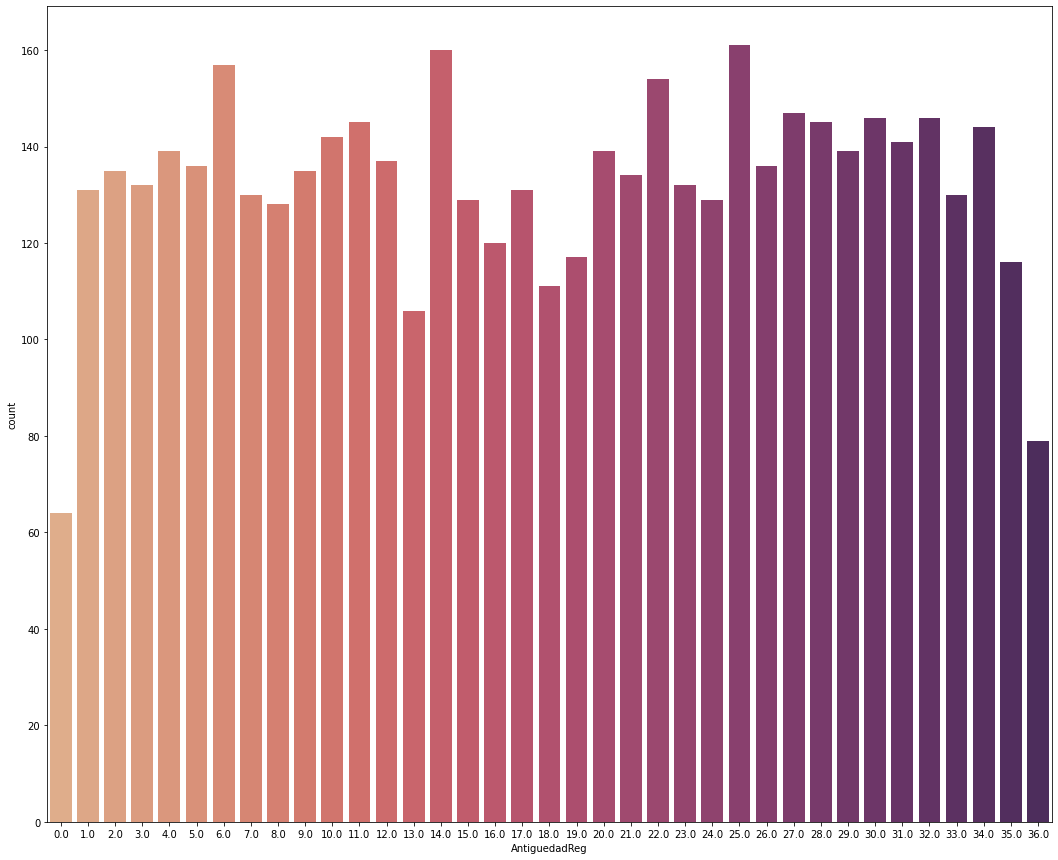

In [29]:
figcat, axcat = plt.subplots(1,1, figsize=(18, 15))
gr = sns.countplot(x='AntiguedadReg', data=tested_m, ax=axcat, palette="flare")

* La mayor cantidad de clientes por antiguedad se encuentran en aquellos se registraron hace 25, 14 , 6 meses con valores de 161, 160, 157 valores respectivamente

### Tiempo Promedio (En Meses) que duran desde la fecha de registro hasta convertirse en suscriptores pago 

In [30]:
# Cuanto tiempo duran en pasar de usuarios registrados a usuarios pagos aquellos usuarios que siguen activos a la fecha 
filter1 = db_data[(db_data['registrationDate'] < db_data['firstPaymentDate']) & (db_data['retirementDate'].isnull())]
user_filter1= db_data.loc[filter1.index]
TiempoRegistroPago = round((user_filter1['firstPaymentDate'] - user_filter1['registrationDate'])/ np.timedelta64(1, 'M'),0)
user_filter1= user_filter1.loc[filter1.index].assign(TiempoRegistroPago = TiempoRegistroPago)
user_filter1

,idCompany,country,registrationDate,planName,paymentFrequency,currency,planPrice,latestPaidPlan,firstPaymentDate,retirementDate,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests,Periodo Ingreso,Periodo Suscripcion Paga,Periodo Retiro,TiempoRegistroPago
0,298933,colombia,2020-06-01,pyme,12,COP,53910,pyme,2020-11-02,NaT,13,"360,818,770.0",5,3,275,2020-06,2020-11,NaT,5.00
3,605717,colombia,2019-02-07,plus,1,COP,179910,plus,2019-08-20,NaT,9133,"391,070,000,000.0",46,5989,28,2019-02,2019-08,NaT,6.00
5,108679,colombia,2019-01-02,pyme,3,COP,53910,pyme,2020-10-01,NaT,20,"296,239,720.0",4,12,81,2019-01,2020-10,NaT,21.00
7,582133,colombia,2019-04-02,plus,1,COP,179910,plus,2020-03-01,NaT,9523,"827,830,000,000.0",45,1644,44,2019-04,2020-03,NaT,11.00
8,677267,colombia,2019-09-26,pyme,12,COP,53910,pyme,2021-05-02,NaT,27,"323,820,315.0",5,4,283,2019-09,2021-05,NaT,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,318578,colombia,2020-03-27,plus,12,COP,179910,plus,2020-04-29,NaT,3366,"146,910,000,000.0",46,2715,55,2020-03,2020-04,NaT,1.00
4995,773474,colombia,2020-05-30,pro,1,COP,107910,pro,2021-04-21,NaT,197,"8,752,708,030.0",11,165,63,2020-05,2021-04,NaT,11.00
4996,1030369,colombia,2019-12-25,pyme,1,COP,53910,pyme,2021-07-26,NaT,40,"3,231,732,600.0",3,33,62,2019-12,2021-07,NaT,19.00
4998,919064,colombia,2020-08-20,pro,12,COP,107910,pro,2021-02-16,NaT,239,"1,505,613,243.0",8,10,140,2020-08,2021-02,NaT,6.00


In [31]:
user_filter1['TiempoRegistroPago'].value_counts(dropna=True).sort_values(ascending=False)

5.00     174
10.00    167
7.00     165
6.00     161
9.00     158
8.00     152
3.00     146
4.00     142
11.00    132
2.00     123
1.00      96
12.00     90
13.00     88
14.00     78
17.00     78
15.00     78
18.00     69
16.00     62
19.00     61
20.00     55
21.00     42
23.00     25
22.00     18
0.00      18
24.00     15
25.00      8
26.00      5
27.00      5
28.00      5
31.00      3
33.00      2
30.00      2
35.00      1
29.00      1
32.00      1
Name: TiempoRegistroPago, dtype: int64

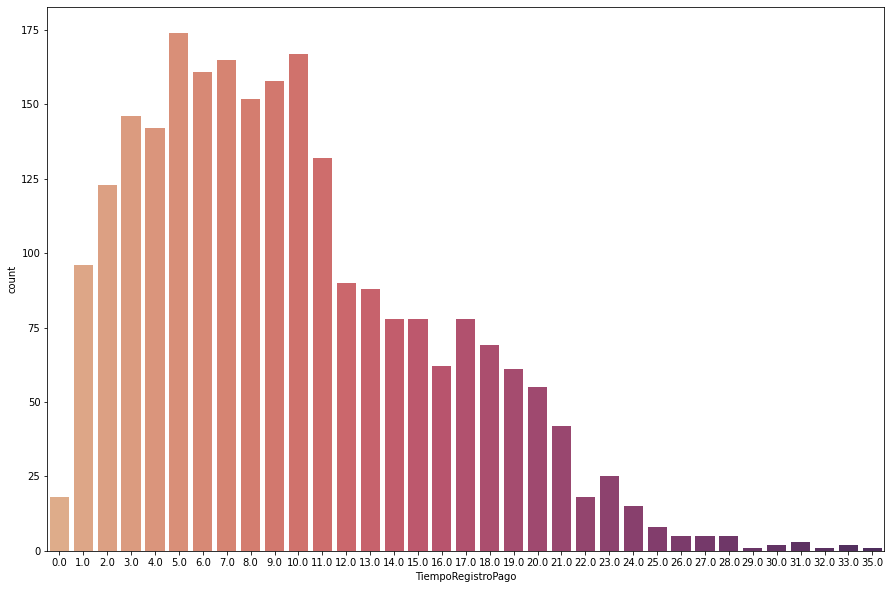

In [32]:
figcat, axcat = plt.subplots(1,1, figsize=(15, 10))
gr = sns.countplot(x='TiempoRegistroPago', data=user_filter1, ax=axcat, palette="flare")


In [33]:
user_filter1['TiempoRegistroPago'].describe()

count   2,426.00
mean        9.70
std         6.08
min         0.00
25%         5.00
50%         9.00
75%        14.00
max        35.00
Name: TiempoRegistroPago, dtype: float64

## Comparación Cambio de Plan ## 

In [34]:
# Registros filtrados donde el Plan Actual es Diferente al ultimo plan pago registrado. 
db_data[(db_data['planName'] != db_data['latestPaidPlan'])]['latestPaidPlan'].value_counts()

plus    271
pro     245
pyme    229
Name: latestPaidPlan, dtype: Int64

* En el calculo anterior realizamos una comparación para ver cuantos usuarios terminan en el nivel 'consulta' luego de haber tenido una suscripción paga y de que planes anteriores provienen. Observamos que todos los registros muestran que los usuarios no hacen downgrade a un plan de nivel inferior al que presentaban, simplemente se retiran y derivan en el plan de menor nivel. En este caso, seria interesante conocer mayores detalles sobre que los motivó  a abandonar los planes anteriores en busca de convertirlos nuevamente en suscriptores de pago. 

In [35]:
# Todos los registros observamos tienen como 'planName' actual el nivel 'consulta'
db_data[(db_data['planName'] != db_data['latestPaidPlan'])]['planName'].unique()

<StringArray>
['consulta']
Length: 1, dtype: string

## Evaluación de los Registros de Acuerdo al Plan Actual que presentan los Usuarios

In [36]:
# Distribución proporcional de los registros de acuerdo al plan que presentan actualmente.
db_data['planName'].value_counts(dropna=False, normalize=True)

pyme       0.41
plus        0.2
consulta    0.2
pro        0.19
Name: planName, dtype: Float64

In [37]:
pivot_planes = pd.pivot_table(db_data, index='Periodo Ingreso', columns='planName', values='idCompany', aggfunc='count')
pivot_planes

planName,consulta,plus,pro,pyme
Periodo Ingreso,,,,
2019-01,30,27,23,58
2019-02,27,25,26,50
2019-03,25,21,27,69
2019-04,28,33,29,32
2019-05,33,26,25,60
2019-06,25,26,31,68
2019-07,31,31,29,58
2019-08,26,28,30,63
2019-09,33,22,26,56


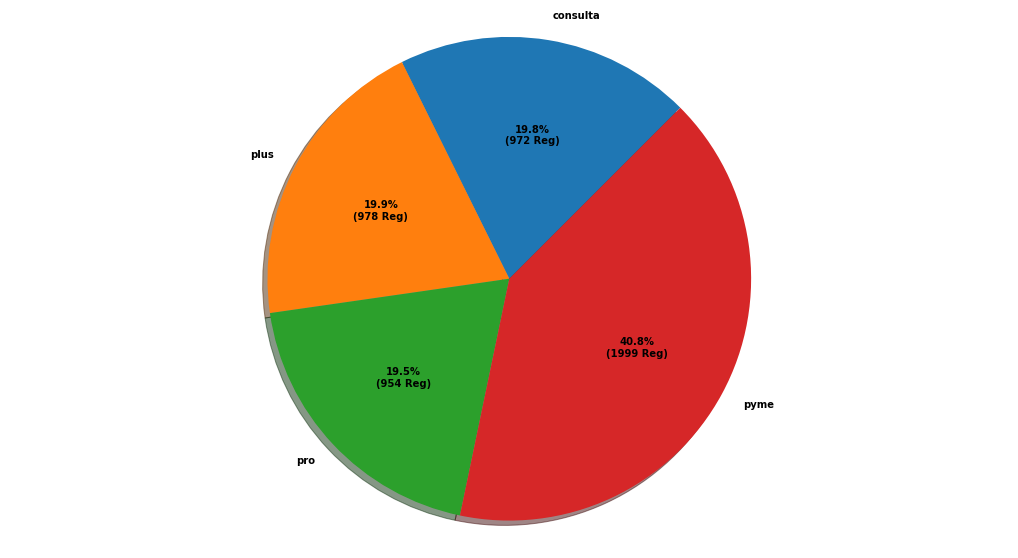

In [38]:
labels = pivot_planes.columns.values  # Etiqueta con Nombres de planes pagos
values = pivot_planes.sum()  # Valor con el total de registros
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(values)))
    return "{:.1f}%\n({:d} Reg)".format(pct, absolute)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:)

fig8, ax8 = plt.subplots(figsize=(18, 10), frameon=True)
wedges, texts, autotexts= ax8.pie(values, autopct=lambda pct: func(pct,values), labels=labels,
        shadow=True, startangle=45, textprops=dict(color="black",weight="bold"))
ax8.axis('equal')  

plt.show()

## Oportunidad de Monetización 
### Enfocarse en que los sucriptores que se encuentran en el plan 'consulta' asciendan a planes pagos en primera instancia debido a que una gran proporcion de los usuarios no generan ingresos 
* Existe un total de 19 % de Usuarios actualmente en el nivel mas bajo de servicios (consulta), todos los demas planes de pagos representan el 81% restante. Sim enbargo, un 40% de los usuarios estan en el nivel mas bajo (pyme) que representan el menor nivel de plan posible. 
### Fomentar la migración de planes de bajo nivel a uno en la siguiente escala. 
* En el mundo de Negocios SaaS el proceso ideal es que el usuario vaya avanzando en los diferentes niveles de planes mientras pasa el tiempo, en este lapso de 36 Meses que evaluamos se observa que no existe migración entre niveles de planes, los usuarios no se trasladan de un plan nivel 1 (pyme) al siguiente nivel 2 (pro). 

In [39]:
# Crear un dataframe filtrado con los valores que no esten retirados y usarlo como base para este calculo.

pivot_planes = pd.pivot_table(db_data, index='Periodo Ingreso', columns=['planName', 'paymentFrequency'], values='idCompany', aggfunc='count')
pivot_planes.mean()

planName  paymentFrequency
plus      1                   6.72
          3                   7.22
          6                   6.42
          12                  6.81
pro       1                   6.78
          3                   6.42
          6                   6.39
          12                  6.92
pyme      1                  14.14
          3                  13.67
          6                  13.81
          12                 13.92
dtype: float64

* El promedio de registros por Mes considerando el tipo de plan y la duración se puede observar que los planes pymes destacan mostrando que el promedio mensual de usuarios registrado se encuentra por encima del 12% en todas las suscripciones disponibles (Anual, Semestral, Cuatrimestral y Mensual) en comparación con los otros 2 tipos de planes donde el promedio de suscripción ronda el 6 y 7% Aprox. 

+ Si solo seleccionamos el mayor por cada tipo de plan disponible vemos que en los planes pyme y pro el promedio mas alto es el de pagos anuales (paymentFrequency = 1). esto muestra que los usuarios que contratan ese tipo de plan visualizan una relacion de largo plazo con el servicio ofrecido. El plan plus por otro lado, genera mayor cantidad de registros promedios en el plan Cuatrimestral ( paymentFrequency = 3)


# Evaluación de los Clientes con fecha de retiro 
* En este púnto se quiere conocer que clientes se han para conocer la tasa de abandono durante los años establecidos (2019 -2022) Para eso, agruparemos el dataframe de acuerdo a los periodos calculados previamente para comparar los usuarios registrados en un periodo (por Ejemplo Enero 2021) y el total de usuarios que abandono su registro en ese mismo periodo.


In [40]:
# ¿ Que tienen en comun todos los registros con fecha de retiro ?
retirados_desc = db_data[db_data['Periodo Retiro'] >= '2019-01']
retirados_desc.describe()

,idCompany,paymentFrequency,planPrice,avgMonInvoices,avgMonBilling,users,downloadReports,helpRequests
count,745.00,0,0,745.00,745.00,745.00,745.00,745.00
mean,"503,963.60",<NA>,<NA>,0.00,0.00,1.49,0.00,14.65
std,"284,099.48",<NA>,<NA>,0.00,0.00,0.50,0.00,9.03
min,557.00,<NA>,<NA>,0.00,0.00,1.00,0.00,0.00
25%,"259,466.00",<NA>,<NA>,0.00,0.00,1.00,0.00,7.00
50%,"492,243.00",<NA>,<NA>,0.00,0.00,1.00,0.00,15.00
75%,"757,291.00",<NA>,<NA>,0.00,0.00,2.00,0.00,23.00
max,"997,166.00",<NA>,<NA>,0.00,0.00,2.00,0.00,30.00


* Presentan bajo numero de usuarios, si se observa el rango en el cual se distribuye los valores el maximo valor observado son 2 usuarios. No presentan valores promedios en Promedio de facturas generadas, monto promedio facturado ni en reporte generados. El servicio de solicitud de soporte muestra solo 14 % en promedio de tickes de soportes generados. En general son clientes que no realizan uso de la plataforma. 

In [41]:
# Se Ordenan el total de usuarios registrados y usuarios que se retiraron por Meses
Churn_rate = pd.DataFrame(db_data.groupby(['planName'])['Periodo Ingreso'].value_counts())
Churn_rate ['Periodo Retiro'] = pd.DataFrame(db_data.groupby(['latestPaidPlan'])['Periodo Retiro'].value_counts())
Churn_rate = Churn_rate.unstack(0).fillna(0)
Churn_rate

Periodo Ingreso               Periodo Retiro                  
planName               consulta plus pro pyme       consulta  plus   pro  pyme
Periodo Ingreso                                                               
2019-01                      30   27  23   58           0.00  2.00  0.00  0.00
2019-02                      27   25  26   50           0.00  1.00  1.00  0.00
2019-03                      25   21  27   69           0.00  4.00  3.00  1.00
2019-04                      28   33  29   32           0.00  1.00  1.00  1.00
2019-05                      33   26  25   60           0.00  1.00  0.00  0.00
2019-06                      25   26  31   68           0.00  4.00  3.00  0.00
2019-07                      31   31  29   58           0.00  3.00  1.00  0.00
2019-08                      26   28  30   63           0.00  2.00  0.00  5.00
2019-09                      33   22  26   56           0.00  4.00  0.00  1.00
2019-10                      30   26  23   77           0.00  4.00  2.00  2.00
2019-11                      21   32  29   56           0.00  4.00  3.00  2.00
2019-12                      32   29  24   62           0.00  3.00  3.00  0.00
2020-01                      26   16  34   57           0.00  3.00  4.00  5.00
2020-02                      27   26  31   50           0.00  4.00  6.00  4.00
2020-03                      28   30  30   50           0.00  5.00  6.00  9.00
2020-04                      31   33  29   51           0.00  4.00  5.00  5.00
2020-05                      18   29  25   57           0.00  7.00  5.00  2.00
2020-06                      28   15  27   36           0.00 11.00  5.00  8.00
2020-07                      29   26  23   63           0.00  5.00  3.00  6.00
2020-08                      25   21  22   42           0.00 11.00  9.00  6.00
2020-09                      25   22  33   43           0.00  6.00  8.00  8.00
2020-10                      24   26  24   74           0.00  7.00  9.00  5.00
2020-11                      24   33  23   56           0.00 11.00  6.00  4.00
2020-12                      24   27  22   58           0.00  4.00  5.00 10.00
2021-01                      21   35  29   56           0.00  9.00 12.00  7.00
2021-02                      18   30  27   47           0.00  7.00  6.00 11.00
2021-03                      28   30  20   66           0.00  7.00  6.00  5.00
2021-04                      33   30  25   54           0.00  2.00  5.00  7.00
2021-05                      23   20  30   49           0.00  5.00  2.00  8.00
2021-06                      23   30  23   67           0.00  6.00  8.00  3.00
2021-07                      31   26  30   60           0.00  8.00 10.00  7.00
2021-08                      21   29  28   59           0.00  8.00  9.00 10.00
2021-09                      27   27  21   70           0.00 15.00  5.00  4.00
2021-10                      30   30  27   41           0.00  2.00  6.00  7.00
2021-11                      33   35  27   41           0.00  5.00 11.00  6.00
2021-12                      34   26  22   43           0.00  5.00  7.00  5.00

* Se ordenan los valores por periodos de tiempo (Mensual) para conocer cuantos usuarios ingresaron de acuerdo a cada plan y cuantos usuarios abandonaron un plan pago en ese mismo periodo.

* Considerando que la Tasa de Abandono (Churn Rate) se calcula : Usuarios que abandonaron el servicio en el Periodo /Usuarios activos al Inicio del Periodo

* Para calcular la tasa de abandono (Churn) por ejemplo para el Mes de Febrero (2019-02) tomamos el valor de los Registros de Usuarios retirados durante febrero ('Periodo Retiro' 2019-02) que son : (0.0 1.0 1.0 0.0) para cada uno de los planes y lo dividimos entre el total de usuarios al iniciar febrero, que en este caso, es el valor de usuarios registrados durante Enero ('Periodo Ingreso' 2019-01) con los valores = (30	27	23	58) respectivamente. esa división nos da 4 valores igual a = (0.0	0.037037 0.043478 0.000000) Nos indica que 3.70% de los usuarios suscritos al plan Plus se retiraron en en Febrero del 2019, 4.34% de los usuarios suscritos al plan Pro se retiraron en ese Mes. los planes Pymes y Consultas no presentaron retiro de usuarios en ese Mes. 

* Para los meses siguientes se realizo un ajuste de usuarios de la siguiente manera (Total de Usuarios Registrados al mes anterior - El total de Usuarios que se retiraron en meses anteriores) el cual forma parte del denominador de la Tasa de Abandono (Churn Rate). El numerador se calculo como el total activos existentes al inicio del Periodo ajustado por aquellos que habian abandonado en Meses anteriores.

In [42]:
# Calculo Tasa CHurn
churn_values = []
feb = Churn_rate['Periodo Retiro'].loc[Churn_rate.index[1]] / Churn_rate['Periodo Ingreso'].iloc[0]
churn_values.append(feb)
for i, t in enumerate(Churn_rate.index[1:]):
    etsg = Churn_rate.cumsum()
    val1 = (etsg['Periodo Ingreso'].loc[t] - etsg['Periodo Retiro'].iloc[i])
    val2 = etsg['Periodo Retiro'].iloc[i+2]
    val3 = etsg['Periodo Retiro'].iloc[i+1]
    diff = val2 - val3
    ratio = diff/ val1
    churn_values.append(ratio)


IndexError: single positional indexer is out-of-bounds

In [43]:
# Tasa de Abandono Churn en % 
Churn = pd.DataFrame(churn_values, columns=Churn_rate.columns.levels[1])
Churn = Churn.drop(Churn.index[1])
Churn = Churn.set_index(Churn_rate.index[1:-1])
Churn

planName,consulta,plus,pro,pyme
Periodo Ingreso,,,,
2019-02,0.00,0.04,0.04,0.00
2019-03,0.00,0.01,0.01,0.01
2019-04,0.00,0.01,0.00,0.00
2019-05,0.00,0.03,0.02,0.00
2019-06,0.00,0.02,0.01,0.00
2019-07,0.00,0.01,0.00,0.01
2019-08,0.00,0.02,0.00,0.00
2019-09,0.00,0.02,0.01,0.00
2019-10,0.00,0.02,0.01,0.00


In [44]:
Churn.mean()

planName
consulta   0.00
plus       0.01
pro        0.01
pyme       0.00
dtype: float64

# Tasa de Abandono (Churn Rate) Historica durante 36 Meses

<AxesSubplot:xlabel='Periodo Ingreso', ylabel='[plus, pro, pyme]'>

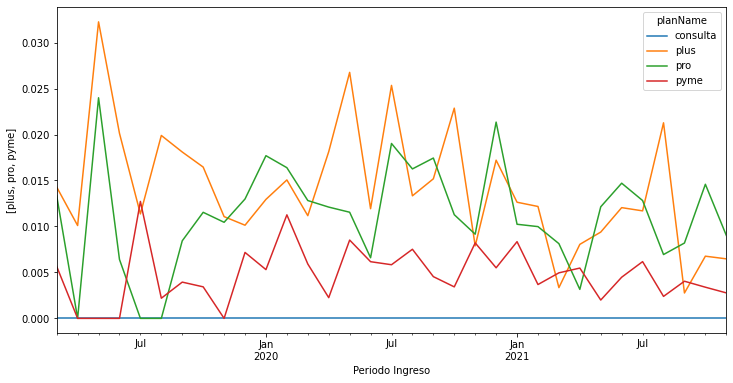

In [45]:
fig6, ax6 = plt.subplots(figsize=(12, 6), frameon=True)
Churn.iloc[1:].plot(kind='line', ylabel=Churn.columns[1:], ax=ax6)


* En la grafica observamos que la tasa de abandono se encuentran por debajo del 3% en todas las categorias de planes lo cual es bueno. El promedio de tasa de Abandono durante los 36 Meses evaluados es menor al 1.5% en todas las categorias, esto nos muestra que de la base de usuarios que se suscribe menos del 2% en promedio durante los 36 Meses deja de usar el producto.

# En resumen 
## Se identificaron las siguientes Oportunidades de Monetización: 

* Atraer a los usuarios que han dejado de usar la plataforma en el ultimo tiempo ofreciendo mayor capacitación, pues debido a lo observado en los datos, la deserción en el uso sobre todo del plan pyme probablemente sea por la inexperticia usando la plataforma.
* Promover la actualización de usuarios a suscripciones de mayor nivel como Semestrales y Anuales por lo menos en el plan Intermedio Pro . Para prolongar el valor esperado por el usuario en el tiempo, crear mayor vinculo y fidelidad entre los usuarios.
* Reducir el tiempo promedio que le toma a un usuario que ingresa en el plan gratuito volverse un usuario pago. Actualmente el promedio del conjunto de datos indica que les toma casi 10 meses pasar a ser usuario pago luego del registro. Los usuarios no se dan de baja en gran cantidad, pero los que estan en modo gratuito son los que menos usan el servicio.

## Modelo de Pricing Ideal ##
* Considerando que es un negocio SaaS la principal razon de costo probablemente no sea los costos de producción del servicio. ¨Por tanto el precing del producto debe estar orientado al valor generado por los diferentes planes ofrecidos. Se debe considerar constantemente las aspiraciones que tienen los usuarios del plan al cual estan suscritos. cada tier que le sigue en la escala de productos debe presentar caracteristicas atractivas que incentiven al usuario a mejorar al plan que tiene actualmente. Enfocarse en que el usuario vaya recorriendo los diferentes planes hasta llegar al de mayor valor acorde a su crecimiento. 

* ¿Cuanto Cobramos? Los precios por planes no parecen presentar un costo significativo comparado con el promedio de facturación en millones de pesos que mantienen los usuarios, por tanto podría existir margen para un ajuste si se observa crecimiento en las ventas por parte de los usuarios.

* ¿ COmo Cobramos? Se factura por el plan completo tratando de diseñar una combinación de funcionalidades atractivas para el usuario, que le permita sentir que la solución obtenida por el servicio corresponde con el producto. 

* ¿Cada cuanto tiempo? Se podria evaluar crear planes bimensuales o trimestrales para ver como se comportan los usuarios.


# Politica de Descuento
* Politica de Descuento puede ser efectiva como una manera de reducir momentaneamente la brecha que existe entre un plan y el nivel de plan que le sigue. Sin embargo habria que considerar implementarlos solamente para usuarios que se encuentren activos con un plan pago en la actualidad. debido a que los descuentos suelen atraer clientes de baja calidad que terminan abandonando al final de la promoción. Lo cual puede causar un impacto negativo en las tasas de abandonos (Churn Rate) 

* Si solo se ofrece descuento a quienes ya tengan contratado el plan se esta elevando el posible valor futuro de estos clientes.

## Punto de Vista del Usuario 
* El usuario del servicio idealmente se siente identificado por mantener un precio estable durante un tiempo prolongado. Para reducir la fricción de por ajuste de precios seria favorable que se ofrecieran nuevas caracteristicas al plan que se encuentran suscrito para justificar ante el usuario el ajuste. Desde su perspectiva es primordial que el usuario sienta que el rendimiento de usar el servicio es mucho mayor a la inversión que esta realizando al suscribirse al producto. 

## ¿Como medir el exito de la estrategia? 
### Incremento en los valores de indicadores claves para negocios SaaS 
* Si se implementa una estrategia de reactivación usuarios se puede dearrollar un incremento los ingresos recurrentes. Lo cual mejoraría los valores calculados para Ingresos recurrentes mensuales (En ingles MRR) y Ingresos recurrentes Anuales (En Ingles ARR)

* Fomentar suscripciones con frecuencias de pagos mas esporadicas, enfocarse principalmente en suscripciones semestrales y anuales, incentivar a los usuarios a migrar a una nueva frecuencia de pago, con el fin de tener ingresos adelantados lo que deriva en mejor flujo de caja. 